In [12]:
import numpy as np
import pandas as pd
import os
import json
from sklearn.model_selection import train_test_split
from run_experiment import run_experiment

In [2]:
dataset_df = pd.read_parquet('data\\final_dataset.parquet')
dataset_df['anchor_age'] = dataset_df['anchor_age'].astype(float)
dataset_df['gender_numeric'] = dataset_df['gender_numeric'].astype(float)
# dataset_df.info()

In [3]:
# print(dataset_df['gcs_score'].value_counts())
# print(dataset_df['gcs_delta'].value_counts())
# print(dataset_df['gcs_deterioration_binary'].value_counts())
# print(dataset_df['gcs_deterioration_multi'].value_counts())

In [4]:
unique_stay_ids = dataset_df['stay_id'].unique()
train_ids, test_ids = train_test_split(unique_stay_ids, test_size=0.2, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

dataset_df['split'] = 'test'
dataset_df.loc[dataset_df['stay_id'].isin(train_ids), 'split'] = 'train'
dataset_df.loc[dataset_df['stay_id'].isin(val_ids), 'split'] = 'val'

print(f"Train length: {len(dataset_df[dataset_df['split'] == 'train'])}")
print(f"Val length: {len(dataset_df[dataset_df['split'] == 'val'])}")
print(f"Test length: {len(dataset_df[dataset_df['split'] == 'test'])}")

Train length: 993179
Val length: 323568
Test length: 329155


In [5]:
demographic_features = ['anchor_age', 'gender_numeric']
static_features = [col for col in dataset_df.columns if col.startswith('item_') and '_t' not in col]
static_features = demographic_features + static_features
sequential_features = [col for col in dataset_df.columns if col.startswith('item_') and '_t' in col]

print(f"Static features length: {len(static_features)}")
print(f"Sequential features length: {len(sequential_features)}")

Static features length: 50
Sequential features length: 27


Train labels: (array([0, 1]), array([31579, 31579]))
Val labels: (array([0, 1]), array([313275,  10293]))
Test labels: (array([0, 1]), array([318534,  10621]))

Epoch 1 | Train Loss: 0.6340 | Val Loss: 0.6156
Epoch 2 | Train Loss: 0.6048 | Val Loss: 0.5852
Epoch 3 | Train Loss: 0.5928 | Val Loss: 0.6247
Epoch 4 | Train Loss: 0.5859 | Val Loss: 0.5549
Epoch 5 | Train Loss: 0.5816 | Val Loss: 0.6088
Epoch 6 | Train Loss: 0.5781 | Val Loss: 0.5880
Epoch 7 | Train Loss: 0.5756 | Val Loss: 0.5888
Epoch 8 | Train Loss: 0.5727 | Val Loss: 0.6037
Epoch 9 | Train Loss: 0.5716 | Val Loss: 0.5812
Epoch 10 | Train Loss: 0.5692 | Val Loss: 0.5613
Epoch 11 | Train Loss: 0.5674 | Val Loss: 0.5809
Epoch 12 | Train Loss: 0.5676 | Val Loss: 0.5445
Epoch 13 | Train Loss: 0.5656 | Val Loss: 0.5689
Epoch 14 | Train Loss: 0.5644 | Val Loss: 0.5786
Epoch 15 | Train Loss: 0.5639 | Val Loss: 0.6129
Epoch 16 | Train Loss: 0.5636 | Val Loss: 0.5732
Epoch 17 | Train Loss: 0.5620 | Val Loss: 0.5744
Epoch 18 | Trai

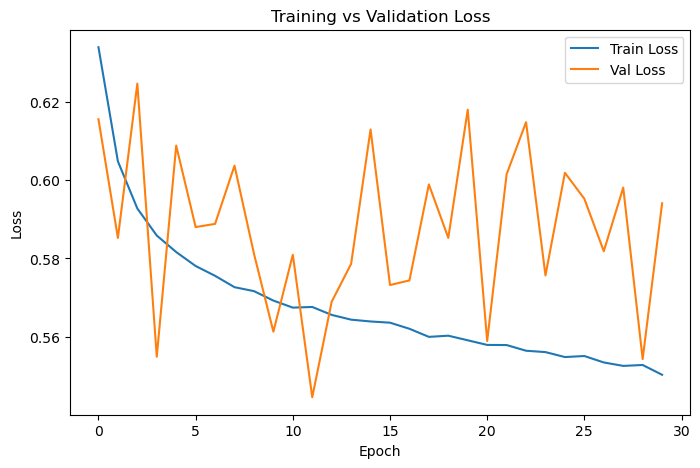

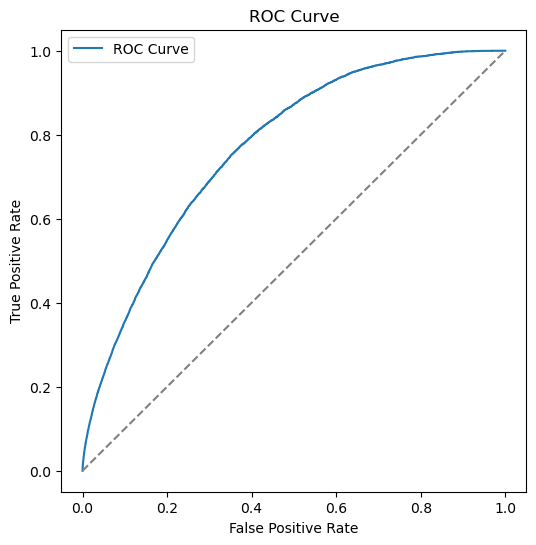

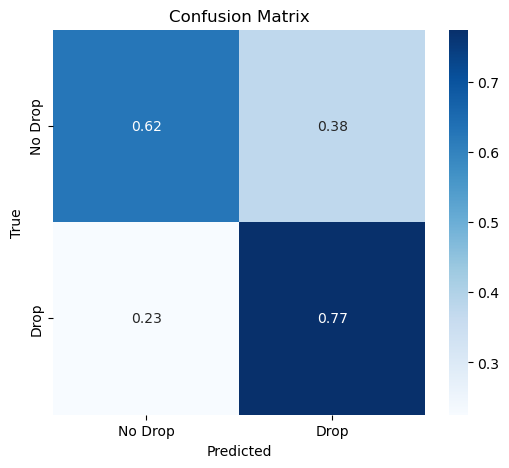

Final Evaluation Results:
Accuracy: 0.6298
Precision: 0.0644
Recall: 0.7746
F1: 0.1190
ROC_AUC: 0.7705
ConfusionMatrix: [[199074 119460]
 [  2394   8227]]


In [6]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_binary",
    config={
        "experiment_name": "exp_gcs_deterioration_binary",
        "task": "classification",
        "epochs": 30,
        "batch_size": 128,
        "lr": 0.001,
        "dropout": 0.2,
        "lstm_hidden": 64,
        "static_hidden": [64, 32],
        "save_dir": "results/exp_gcs_deterioration_binary"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Train labels: (array([0, 1]), array([31579, 31579]))
Val labels: (array([0, 1]), array([313275,  10293]))
Test labels: (array([0, 1]), array([318534,  10621]))

Epoch 1 | Train Loss: 0.6263 | Val Loss: 0.5669
Epoch 2 | Train Loss: 0.5971 | Val Loss: 0.5895
Epoch 3 | Train Loss: 0.5848 | Val Loss: 0.5871
Epoch 4 | Train Loss: 0.5798 | Val Loss: 0.5857
Epoch 5 | Train Loss: 0.5761 | Val Loss: 0.6242
Epoch 6 | Train Loss: 0.5721 | Val Loss: 0.5584
Epoch 7 | Train Loss: 0.5686 | Val Loss: 0.5196
Epoch 8 | Train Loss: 0.5669 | Val Loss: 0.5881
Epoch 9 | Train Loss: 0.5663 | Val Loss: 0.5884
Epoch 10 | Train Loss: 0.5635 | Val Loss: 0.5643
Epoch 11 | Train Loss: 0.5612 | Val Loss: 0.6009
Epoch 12 | Train Loss: 0.5601 | Val Loss: 0.5845
Epoch 13 | Train Loss: 0.5588 | Val Loss: 0.5874
Epoch 14 | Train Loss: 0.5572 | Val Loss: 0.5622
Epoch 15 | Train Loss: 0.5562 | Val Loss: 0.5836
Epoch 16 | Train Loss: 0.5555 | Val Loss: 0.5863
Epoch 17 | Train Loss: 0.5537 | Val Loss: 0.6250
Epoch 18 | Trai

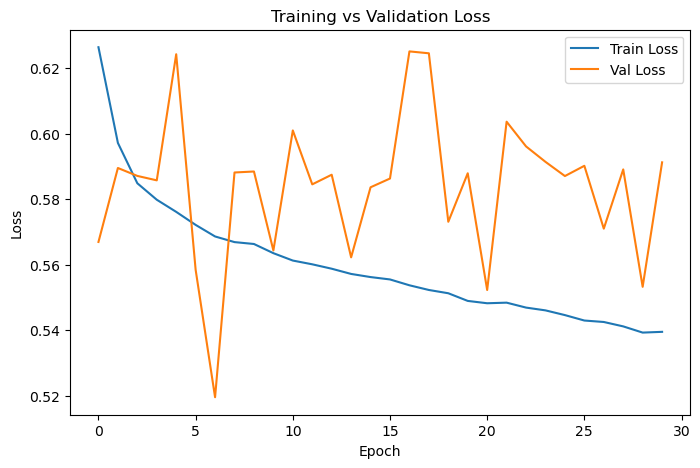

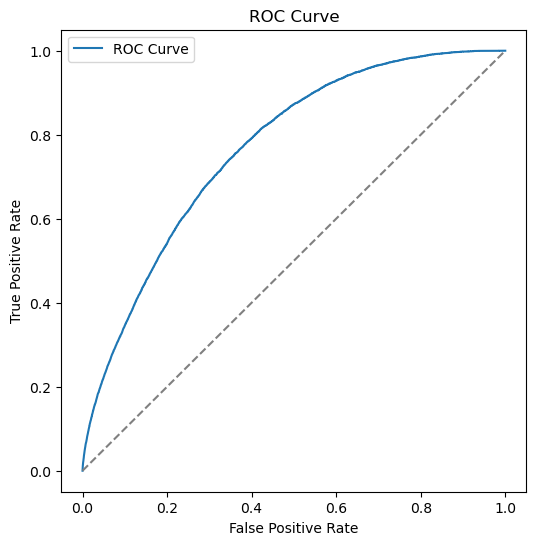

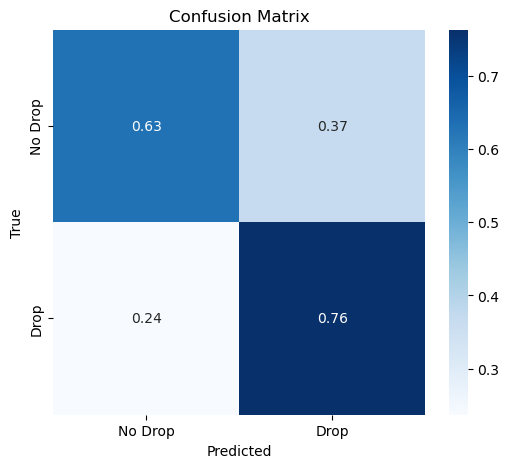

Final Evaluation Results:
Accuracy: 0.6347
Precision: 0.0644
Recall: 0.7628
F1: 0.1188
ROC_AUC: 0.7674
ConfusionMatrix: [[200811 117723]
 [  2519   8102]]


In [7]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_binary",
    config={
        "experiment_name": "exp_gcs_deterioration_binary_bigger",
        "task": "classification",
        "epochs": 30,
        "batch_size": 128,
        "lr": 0.001,
        "dropout": 0.2,
        "lstm_hidden": 128, # <-- was 64
        "static_hidden": [128, 64, 32], # <-- deeper static branch
        "save_dir": "results/exp_gcs_deterioration_binary_bigger"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Train labels: (array([0, 1]), array([31579, 31579]))
Val labels: (array([0, 1]), array([313275,  10293]))
Test labels: (array([0, 1]), array([318534,  10621]))

Epoch 1 | Train Loss: 0.6449 | Val Loss: 0.6280
Epoch 2 | Train Loss: 0.6139 | Val Loss: 0.6161
Epoch 3 | Train Loss: 0.6038 | Val Loss: 0.6095
Epoch 4 | Train Loss: 0.5939 | Val Loss: 0.5682
Epoch 5 | Train Loss: 0.5897 | Val Loss: 0.5890
Epoch 6 | Train Loss: 0.5850 | Val Loss: 0.5680
Epoch 7 | Train Loss: 0.5828 | Val Loss: 0.5739
Epoch 8 | Train Loss: 0.5793 | Val Loss: 0.6023
Epoch 9 | Train Loss: 0.5757 | Val Loss: 0.5816
Epoch 10 | Train Loss: 0.5754 | Val Loss: 0.5600
Epoch 11 | Train Loss: 0.5727 | Val Loss: 0.5550
Epoch 12 | Train Loss: 0.5715 | Val Loss: 0.5837
Epoch 13 | Train Loss: 0.5700 | Val Loss: 0.5767
Epoch 14 | Train Loss: 0.5693 | Val Loss: 0.5696
Epoch 15 | Train Loss: 0.5684 | Val Loss: 0.5822
Epoch 16 | Train Loss: 0.5671 | Val Loss: 0.5682
Epoch 17 | Train Loss: 0.5662 | Val Loss: 0.5773
Epoch 18 | Trai

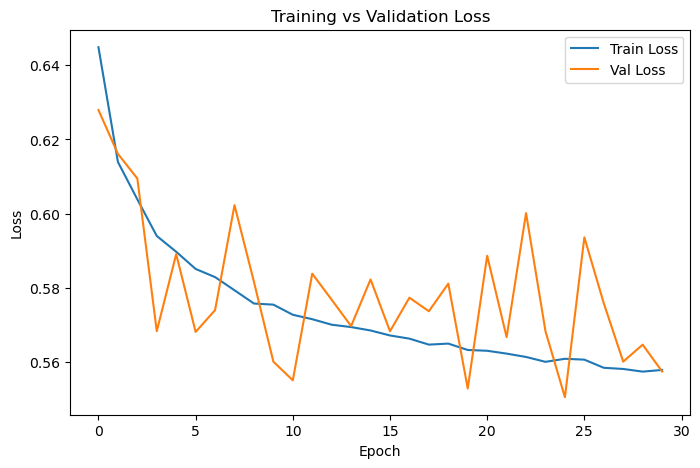

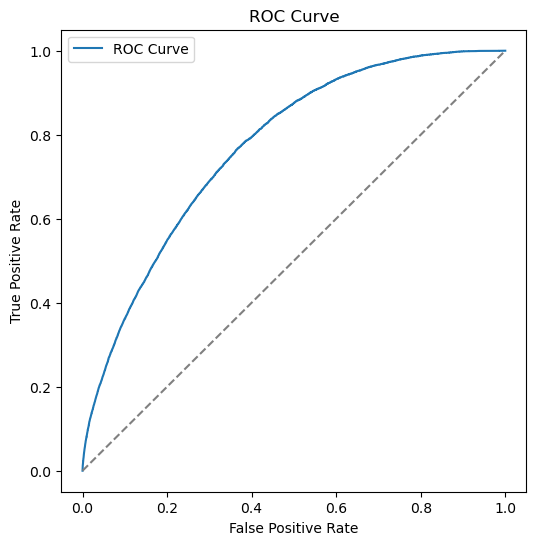

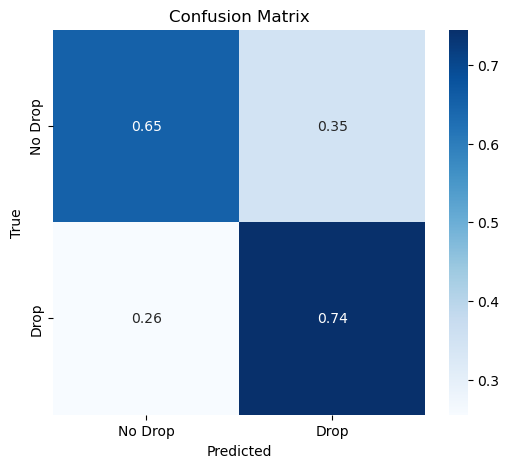

Final Evaluation Results:
Accuracy: 0.6554
Precision: 0.0667
Recall: 0.7448
F1: 0.1224
ROC_AUC: 0.7712
ConfusionMatrix: [[207819 110715]
 [  2711   7910]]


In [8]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_binary",
    config={
        "experiment_name": "exp_gcs_deterioration_binary_lowlr",
        "task": "classification",
        "epochs": 30,
        "batch_size": 128,
        "lr": 0.0005, # <-- lower LR
        "dropout": 0.2,
        "lstm_hidden": 64,
        "static_hidden": [64, 32],
        "save_dir": "results/exp_gcs_deterioration_binary_lowlr"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Train labels: (array([0, 1]), array([31579, 31579]))
Val labels: (array([0, 1]), array([313275,  10293]))
Test labels: (array([0, 1]), array([318534,  10621]))

Epoch 1 | Train Loss: 0.6476 | Val Loss: 0.6502
Epoch 2 | Train Loss: 0.6200 | Val Loss: 0.6115
Epoch 3 | Train Loss: 0.6080 | Val Loss: 0.6117
Epoch 4 | Train Loss: 0.6000 | Val Loss: 0.5720
Epoch 5 | Train Loss: 0.5960 | Val Loss: 0.5891
Epoch 6 | Train Loss: 0.5912 | Val Loss: 0.5673
Epoch 7 | Train Loss: 0.5896 | Val Loss: 0.5966
Epoch 8 | Train Loss: 0.5858 | Val Loss: 0.5850
Epoch 9 | Train Loss: 0.5874 | Val Loss: 0.5459
Epoch 10 | Train Loss: 0.5826 | Val Loss: 0.5819
Epoch 11 | Train Loss: 0.5805 | Val Loss: 0.5780
Epoch 12 | Train Loss: 0.5802 | Val Loss: 0.5702
Epoch 13 | Train Loss: 0.5785 | Val Loss: 0.5946
Epoch 14 | Train Loss: 0.5775 | Val Loss: 0.5541
Epoch 15 | Train Loss: 0.5762 | Val Loss: 0.5619
Epoch 16 | Train Loss: 0.5755 | Val Loss: 0.5707
Epoch 17 | Train Loss: 0.5738 | Val Loss: 0.5550
Epoch 18 | Trai

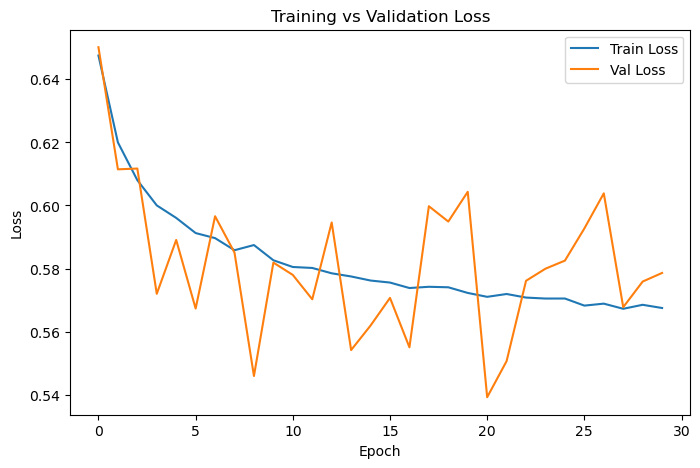

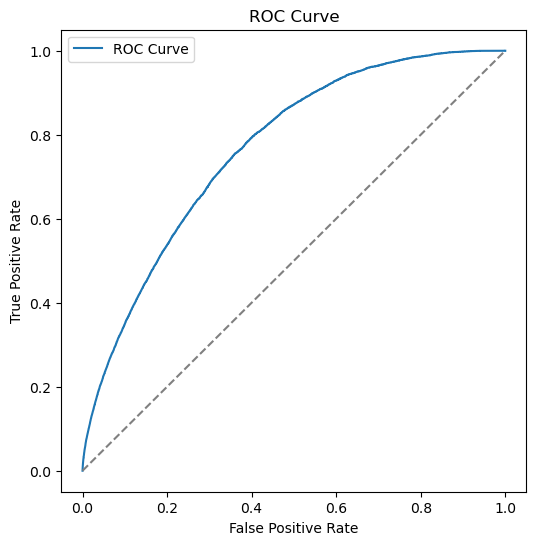

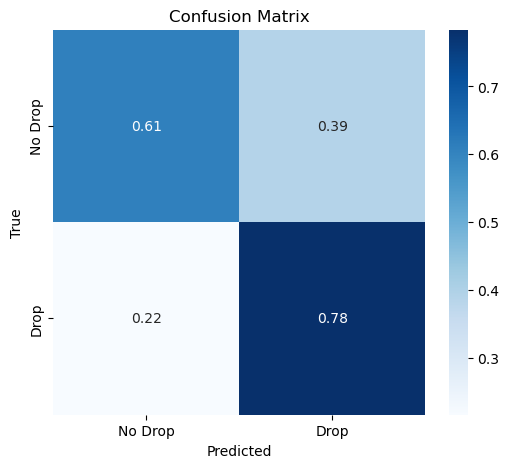

Final Evaluation Results:
Accuracy: 0.6154
Precision: 0.0628
Recall: 0.7835
F1: 0.1162
ROC_AUC: 0.7670
ConfusionMatrix: [[194253 124281]
 [  2299   8322]]


In [9]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_binary",
    config={
        "experiment_name": "exp_gcs_deterioration_binary_dropout",
        "task": "classification",
        "epochs": 30,
        "batch_size": 128,
        "lr": 0.001,
        "dropout": 0.4, # <-- more dropout
        "lstm_hidden": 64,
        "static_hidden": [64, 32],
        "save_dir": "results/exp_gcs_deterioration_binary_dropout"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Train labels: (array([0, 1]), array([31579, 31579]))
Val labels: (array([0, 1]), array([313275,  10293]))
Test labels: (array([0, 1]), array([318534,  10621]))

Epoch 1 | Train Loss: 0.6264 | Val Loss: 0.5620
Epoch 2 | Train Loss: 0.5989 | Val Loss: 0.5628
Epoch 3 | Train Loss: 0.5884 | Val Loss: 0.5357
Epoch 4 | Train Loss: 0.5811 | Val Loss: 0.5929
Epoch 5 | Train Loss: 0.5780 | Val Loss: 0.5738
Epoch 6 | Train Loss: 0.5738 | Val Loss: 0.5586
Epoch 7 | Train Loss: 0.5717 | Val Loss: 0.5769
Epoch 8 | Train Loss: 0.5701 | Val Loss: 0.5573
Epoch 9 | Train Loss: 0.5687 | Val Loss: 0.5708
Epoch 10 | Train Loss: 0.5674 | Val Loss: 0.5632
Epoch 11 | Train Loss: 0.5659 | Val Loss: 0.5683
Epoch 12 | Train Loss: 0.5648 | Val Loss: 0.5583
Epoch 13 | Train Loss: 0.5637 | Val Loss: 0.5787
Epoch 14 | Train Loss: 0.5615 | Val Loss: 0.5691
Epoch 15 | Train Loss: 0.5604 | Val Loss: 0.5788
Epoch 16 | Train Loss: 0.5604 | Val Loss: 0.5513
Epoch 17 | Train Loss: 0.5592 | Val Loss: 0.6343
Epoch 18 | Trai

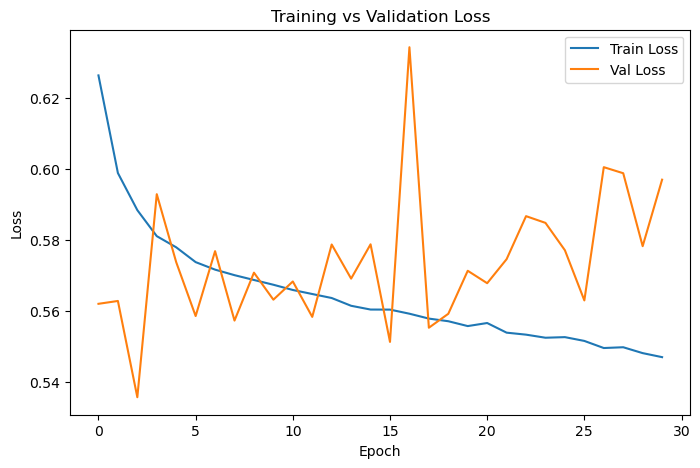

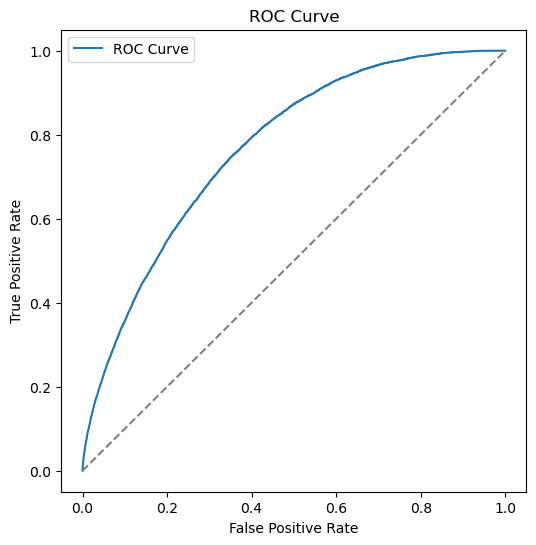

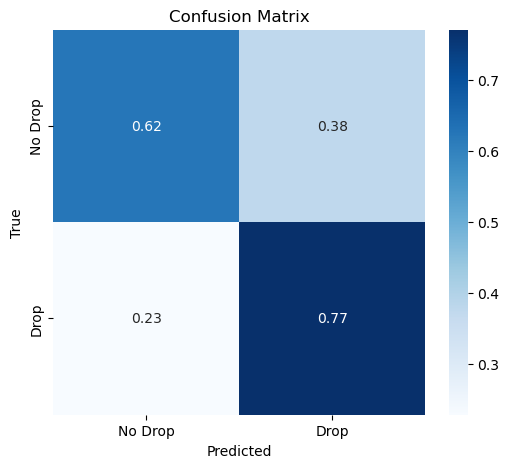

Final Evaluation Results:
Accuracy: 0.6281
Precision: 0.0639
Recall: 0.7713
F1: 0.1180
ROC_AUC: 0.7693
ConfusionMatrix: [[198538 119996]
 [  2429   8192]]


In [10]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_binary",
    config={
        "experiment_name": "exp_gcs_deterioration_binary_smallbatch",
        "task": "classification",
        "epochs": 30,
        "batch_size": 64, # <-- smaller batch
        "lr": 0.001,
        "dropout": 0.2,
        "lstm_hidden": 64,
        "static_hidden": [64, 32],
        "save_dir": "results/exp_gcs_deterioration_binary_smallbatch"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

In [19]:
def load_all_metrics(results_root="results"):
    records = []

    for exp_dir in [d for d in os.listdir(results_root) if 'gcs_deterioration_binary' in d]:
        exp_path = os.path.join(results_root, exp_dir)
        metrics_path = os.path.join(exp_path, "metrics.json")
        config_path = os.path.join(exp_path, "config.json")

        if os.path.isfile(metrics_path):
            with open(metrics_path, "r") as f:
                metrics = json.load(f)
            if os.path.isfile(config_path):
                with open(config_path, "r") as f:
                    config = json.load(f)
                metrics.update({
                    "experiment_name": config.get("experiment_name", exp_dir),
                    "task": config.get("task", "unknown")
                })
            else:
                metrics["experiment_name"] = exp_dir
                metrics["task"] = "unknown"

            records.append(metrics)

    df = pd.DataFrame.from_records(records)
    return df

metrics_df = load_all_metrics(results_root="results")[['experiment_name', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall', 'F1']]
display(metrics_df.sort_values("ROC_AUC", ascending=False))

,experiment_name,Accuracy,ROC_AUC,Precision,Recall,F1
3,exp_gcs_deterioration_binary_lowlr,0.6554024699609606,0.7712440255975035,0.06668071654373024,0.7447509650692026,0.12240224068829983
0,exp_gcs_deterioration_binary,0.6297975118105452,0.7704777242819272,0.06443099140867904,0.774597495527728,0.11896636492466091
4,exp_gcs_deterioration_binary_smallbatch,0.6280627667816074,0.76927349317635,0.0639061378600181,0.7713021372752095,0.11803269240467117
1,exp_gcs_deterioration_binary_bigger,0.6346949005787547,0.7674138538704307,0.06439101927279953,0.7628283589115903,0.11875760374067397
2,exp_gcs_deterioration_binary_dropout,0.615439534565782,0.766960547137068,0.06275876111400194,0.7835420393559929,0.11620957381444451


In [22]:
print(metrics_df.to_csv(index=False))

experiment_name,Accuracy,ROC_AUC,Precision,Recall,F1
exp_gcs_deterioration_binary,0.6297975118105452,0.7704777242819272,0.06443099140867904,0.774597495527728,0.11896636492466091
exp_gcs_deterioration_binary_bigger,0.6346949005787547,0.7674138538704307,0.06439101927279953,0.7628283589115903,0.11875760374067397
exp_gcs_deterioration_binary_dropout,0.615439534565782,0.766960547137068,0.06275876111400194,0.7835420393559929,0.11620957381444451
exp_gcs_deterioration_binary_lowlr,0.6554024699609606,0.7712440255975035,0.06668071654373024,0.7447509650692026,0.12240224068829983
exp_gcs_deterioration_binary_smallbatch,0.6280627667816074,0.76927349317635,0.0639061378600181,0.7713021372752095,0.11803269240467117



Train labels: (array([0, 1, 2, 3]), array([12814, 12814, 12814, 12814]))
Val labels: (array([0, 1, 2, 3]), array([294988,  18287,   4183,   6110]))
Test labels: (array([0, 1, 2, 3]), array([299555,  18979,   4140,   6481]))

Epoch 1 | Train Loss: 1.3408 | Val Loss: 1.2757
Epoch 2 | Train Loss: 1.3066 | Val Loss: 1.2169
Epoch 3 | Train Loss: 1.2963 | Val Loss: 1.1251
Epoch 4 | Train Loss: 1.2865 | Val Loss: 1.2804
Epoch 5 | Train Loss: 1.2794 | Val Loss: 1.1889
Epoch 6 | Train Loss: 1.2753 | Val Loss: 1.1634
Epoch 7 | Train Loss: 1.2722 | Val Loss: 1.1985
Epoch 8 | Train Loss: 1.2686 | Val Loss: 1.2553
Epoch 9 | Train Loss: 1.2658 | Val Loss: 1.1650
Epoch 10 | Train Loss: 1.2622 | Val Loss: 1.2255
Epoch 11 | Train Loss: 1.2618 | Val Loss: 1.2118
Epoch 12 | Train Loss: 1.2600 | Val Loss: 1.2911
Epoch 13 | Train Loss: 1.2584 | Val Loss: 1.1895
Epoch 14 | Train Loss: 1.2569 | Val Loss: 1.2450
Epoch 15 | Train Loss: 1.2561 | Val Loss: 1.2191
Epoch 16 | Train Loss: 1.2546 | Val Loss: 1.1755


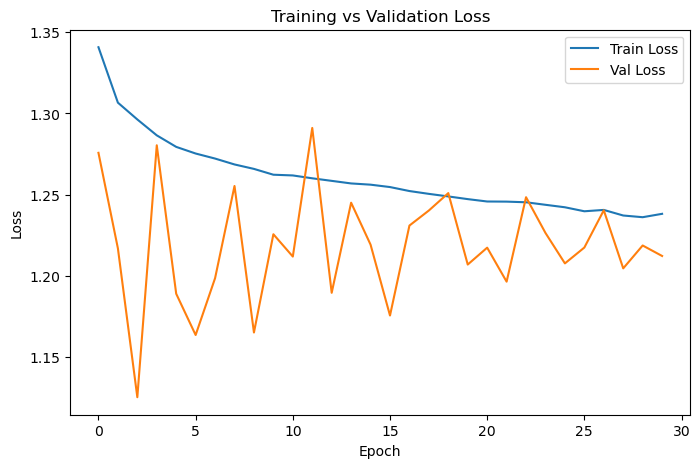

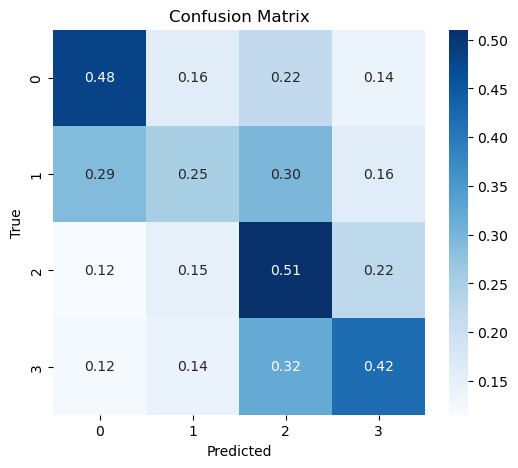

Final Evaluation Results:
Accuracy: 0.4674
Precision_macro: 0.2816
Recall_macro: 0.4149
F1_macro: 0.2304
ConfusionMatrix: [[144274  48146  65368  41767]
 [  5525   4759   5643   3052]
 [   478    621   2112    929]
 [   791    919   2068   2703]]


In [23]:
results = run_experiment(
    dataset_df,
    static_features,
    sequential_features,
    target="gcs_deterioration_multi",
    config={
        "experiment_name": "exp_gcs_deterioration_multi",
        "task": "multiclass",
        "num_classes": 4,
        "epochs": 30,
        "batch_size": 128,
        "lr": 0.001,
        "dropout": 0.2,
        "lstm_hidden": 64,
        "static_hidden": [64, 32],
        "save_dir": "results/exp_gcs_deterioration_multi"
    },
    balance_data=True
)

print("Final Evaluation Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")